# ANN Introduction - Tensorflow Basics

In [130]:
%matplotlib inline

In [133]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Numpy Introduction


## Reference


- Numpy Manual: https://docs.scipy.org/doc/numpy/

## Create Arrays

### Manual Creation

In [ ]:
a1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
a1

### Reshape

In [ ]:
a2 = np.arange(1,10).reshape(3,3)
a2

### zeors, ones, empty, random, randn

In [ ]:
a3 = np.empty((3,3))
a4 = np.zeros((3,3))
a5 = np.ones((3,3))
a6 = np.random.random((3,3))
a7 = np.random.randn(3,3)

In [ ]:
print(a3)
print(a4)
print(a5)
print(a6)
print(a7)

## Array Propertites

### ndim, shape, size, dtype

In [ ]:
a1 = np.arange(1,10).reshape(3,3)
a1

In [ ]:
print(a1.ndim)
print(a1.shape)
print(a1.size)
print(a1.dtype)

### Change dtype

In [ ]:
a2 = a1.astype(float)
print(a1)
print(a1.dtype)
print(a2)
print(a2.dtype)

## Functions

### Basic

In [ ]:
a1 = np.array([[1,2,3], [4,5,6], [7,8,9]])
a2 = np.ones((3,3))
print(a1)
print(a2)

In [ ]:
print(a1 + a2)

In [ ]:
print(a1 - a2)

In [ ]:
print(a1 + 2 * a2)

In [ ]:
print(a1.sum())
print(a1.max())
print(a1.min())

### Customized Functions

In [134]:
def gaussian(x, m, s):
    return (1.0 / (s * np.sqrt(2 * np.pi))) * np.exp(-np.power(x - m, 2.0) / (2 * np.power(s, 2.0)))

In [135]:
x = np.linspace(-5, 5, 200)

In [136]:
y = gaussian(x,0,1)

<function matplotlib.pyplot.show(*args, **kw)>

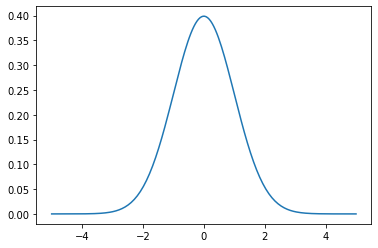

In [137]:
plt.plot(x,y)
plt.show

# Tensorflow Basic

- Architecture: https://www.tensorflow.org/guide/extend/architecture

## Low Level API

- TensorFlow Core
- The interal exposed API for advanced users
- Not recommended for most users

## High Level API

- Keras: https://keras.io/
- Fast prototyping
- Production
- User friendly

## Demo 1 - Regression

**Regression Target Function**: y = x\*\*2 + y\*\*2

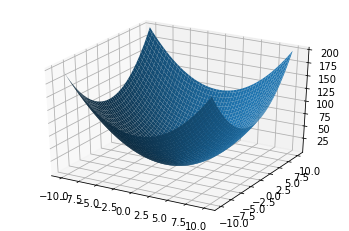

In [138]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

### Build the Model

- Input: [x, y]
- Ouput: z
- Num. of layers: 1 x Input + 1 x Hidden + 1 x Output = 3

In [139]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='sigmoid', input_shape=(2,)),
        layers.Dense(1)
    ]
)
optimizer = keras.optimizers.RMSprop(0.01)
model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mse']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [140]:
def sampling(x, y):
    X, Y = np.meshgrid(x, y)
    Z = X**2 + Y**2
    samples = np.stack((X.flatten(),Y.flatten(),Z.flatten()), axis=1)
    np.random.shuffle(samples)
    return samples

def split_labels(samples):
    return (samples[:,0:-1], samples[:,-1])

def split_samples(samples, ratio):
    sep = int(samples.shape[0] * ratio)
    return (samples[0:sep], samples[sep:])

In [141]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

samples = sampling(x, y)

train_samples, test_samples = split_samples(samples, 0.8)

(train_x, train_y) = split_labels(train_samples)
(test_x, test_y) = split_labels(test_samples)

history = model.fit(train_x, train_y, batch_size=100, epochs=10)

Train on 800000 samples
Epoch 1/10
800000/800000 [==============================] - 16s 20us/sample - loss: 1813.3649 - mse: 1813.3645
Epoch 2/10
800000/800000 [==============================] - 16s 20us/sample - loss: 1594.3231 - mse: 1594.3240
Epoch 3/10
800000/800000 [==============================] - 17s 21us/sample - loss: 105.7845 - mse: 105.7837
Epoch 4/10
800000/800000 [==============================] - 22s 27us/sample - loss: 1.7065 - mse: 1.7065
Epoch 5/10
800000/800000 [==============================] - 17s 21us/sample - loss: 1.5047 - mse: 1.5047
Epoch 6/10
800000/800000 [==============================] - 17s 21us/sample - loss: 1.4075 - mse: 1.4075
Epoch 7/10
800000/800000 [==============================] - 16s 20us/sample - loss: 1.3348 - mse: 1.3348
Epoch 8/10
800000/800000 [==============================] - 17s 21us/sample - loss: 1.2817 - mse: 1.2817
Epoch 9/10
800000/800000 [==============================] - 18s 22us/sample - loss: 1.2342 - mse: 1.2342
Epoch 10/10
800

In [142]:
ret = model.evaluate(test_x, test_y)

200000/200000 [==============================] - 7s 37us/sample - loss: 1.9481 - mse: 1.9481


10000/10000 [==============================] - 0s 39us/sample - loss: 2.0715 - mse: 2.0715


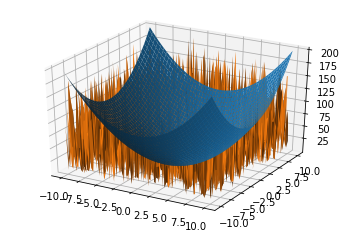

In [143]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

v_samples = sampling(x, y)
v_x, v_actual = split_labels(v_samples)
v_y = model.predict(v_x)
model.evaluate(v_x, v_actual)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.plot_surface(X, Y, v_y.reshape(100,100))

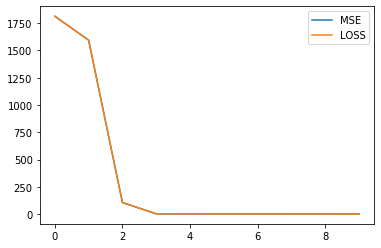

In [147]:
history.history.keys()
fig, ax = plt.subplots()
ax.plot(history.history['mse'], label="MSE")
ax.plot(history.history['loss'], label="LOSS")
ax.legend()

## Demo 2 - Binary Classification

### Load Data - Titanic

In [148]:
import pandas as pd
data_raw = pd.read_csv('data/titanic_train.csv')
data = pd.read_csv('data/titanic_clean_numeric.csv')

In [149]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
data.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,1,0,1,1,2,1,0,3
2,2,1,3,1,0,0,0,2,1,0,1,1
3,3,1,1,1,1,0,0,1,2,1,0,3
4,4,0,3,0,0,0,0,0,2,0,1,1


### Split Data

In [151]:
data_train = data.loc[:599]
data_val = data.loc[599:]

In [152]:
train_x = data_train.loc[:, data.columns != "Survived"]
train_y = data_train.loc[:, data.columns == "Survived"]
val_x = data_val.loc[:, data.columns != "Survived"]
val_y = data_val.loc[:, data.columns == "Survived"]

In [153]:
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)

(600, 11)
(600, 1)
(292, 11)
(292, 1)


### Build the Model

In [154]:
model = keras.Sequential(
    [
        layers.Dense(6, activation='sigmoid', input_shape=(11,)),
        layers.Dense(6, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
optimizer = keras.optimizers.Adam(0.01)
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['acc']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = model.fit(train_x, train_y, batch_size=10, epochs=100)

Train on 600 samples
Epoch 1/100
600/600 [==============================] - 0s 498us/sample - loss: 0.6733 - acc: 0.5917
Epoch 2/100
600/600 [==============================] - 0s 222us/sample - loss: 0.6781 - acc: 0.6067
Epoch 3/100
600/600 [==============================] - 0s 244us/sample - loss: 0.6709 - acc: 0.6067
Epoch 4/100
600/600 [==============================] - 0s 248us/sample - loss: 0.6725 - acc: 0.5850
Epoch 5/100
600/600 [==============================] - 0s 249us/sample - loss: 0.6689 - acc: 0.6183
Epoch 6/100
600/600 [==============================] - 0s 245us/sample - loss: 0.6647 - acc: 0.6150
Epoch 7/100
600/600 [==============================] - 0s 226us/sample - loss: 0.6671 - acc: 0.6100
Epoch 8/100
600/600 [==============================] - 0s 250us/sample - loss: 0.6655 - acc: 0.6217
Epoch 9/100
600/600 [==============================] - 0s 244us/sample - loss: 0.6605 - acc: 0.6283
Epoch 10/100
600/600 [==============================] - 0s 311us/sample - loss:

600/600 [==============================] - 0s 252us/sample - loss: 0.4659 - acc: 0.8150
Epoch 82/100
600/600 [==============================] - 0s 286us/sample - loss: 0.4838 - acc: 0.8000
Epoch 83/100
600/600 [==============================] - 0s 302us/sample - loss: 0.4659 - acc: 0.8217
Epoch 84/100
600/600 [==============================] - 0s 227us/sample - loss: 0.5229 - acc: 0.7683
Epoch 85/100
600/600 [==============================] - 0s 252us/sample - loss: 0.4748 - acc: 0.8183
Epoch 86/100
600/600 [==============================] - 0s 227us/sample - loss: 0.4783 - acc: 0.8067
Epoch 87/100
600/600 [==============================] - 0s 218us/sample - loss: 0.4827 - acc: 0.7983
Epoch 88/100
600/600 [==============================] - 0s 248us/sample - loss: 0.4700 - acc: 0.8067
Epoch 89/100
600/600 [==============================] - 0s 242us/sample - loss: 0.4641 - acc: 0.8183
Epoch 90/100
600/600 [==============================] - 0s 223us/sample - loss: 0.4680 - acc: 0.8017
Epo

In [156]:
ret = model.evaluate(val_x, val_y)

292/292 [==============================] - 0s 331us/sample - loss: 0.5505 - acc: 0.7534


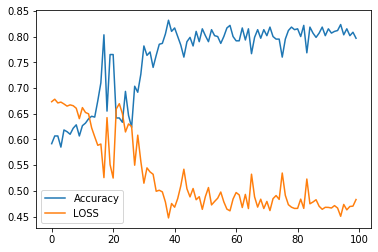

In [157]:
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label="Accuracy")
ax.plot(history.history['loss'], label="LOSS")
ax.legend()

## Demo 3 - Multi-Class Classification

### Load Data - Iris

The iris dataset can be downloaded from http://archive.ics.uci.edu/ml/datasets/Iris

In [158]:
import pandas as pd
data = pd.read_csv("data/iris.csv", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
data.columns = ["sepal_l", "sepal_w", "petal_l", "petal_w", "class"]

In [160]:
data.head()

,sepal_l,sepal_w,petal_l,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
data = data.sample(frac=1)

In [162]:
data.head()

,sepal_l,sepal_w,petal_l,petal_w,class
46,5.1,3.8,1.6,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa


### Label Encode

In [163]:
data["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [164]:
data["versicolor"] = data["class"].apply(lambda x: 1 if x == "Iris-versicolor" else 0)
data["virginica"] = data["class"].apply(lambda x: 1 if x == "Iris-virginica" else 0)
data["setosa"] = data["class"].apply(lambda x: 1 if x == "Iris-setosa" else 0)

In [165]:
data.drop(["class"],axis=1, inplace=True)

In [166]:
data.head()

,sepal_l,sepal_w,petal_l,petal_w,versicolor,virginica,setosa
46,5.1,3.8,1.6,0.2,0,0,1
45,4.8,3.0,1.4,0.3,0,0,1
87,6.3,2.3,4.4,1.3,1,0,0
127,6.1,3.0,4.9,1.8,0,1,0
42,4.4,3.2,1.3,0.2,0,0,1


### Split Data

In [167]:
len(data)

150

In [168]:
train = data[0:120]
val = data[120:]

In [169]:
train_x, train_y = train.iloc[:,0:4], train.iloc[:,4:]
val_x, val_y = val.iloc[:,0:4], val.iloc[:,4:]

In [170]:
train_x.head()

,sepal_l,sepal_w,petal_l,petal_w
46,5.1,3.8,1.6,0.2
45,4.8,3.0,1.4,0.3
87,6.3,2.3,4.4,1.3
127,6.1,3.0,4.9,1.8
42,4.4,3.2,1.3,0.2


In [171]:
train_y.head()

,versicolor,virginica,setosa
46,0,0,1
45,0,0,1
87,1,0,0
127,0,1,0
42,0,0,1


### Build the Model

In [172]:
model = keras.Sequential(
    [
        layers.Dense(8, activation='sigmoid', input_shape=(4,)),
        layers.Dense(3, activation='softmax')
    ]
)
optimizer = keras.optimizers.Adam(0.01)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['acc']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [173]:
history = model.fit(train_x, train_y, batch_size=10, epochs=100)

Train on 120 samples
Epoch 1/100
120/120 [==============================] - 0s 1ms/sample - loss: 1.0759 - acc: 0.3500
Epoch 2/100
120/120 [==============================] - 0s 292us/sample - loss: 0.9887 - acc: 0.7333
Epoch 3/100
120/120 [==============================] - 0s 267us/sample - loss: 0.8896 - acc: 0.8250
Epoch 4/100
120/120 [==============================] - 0s 357us/sample - loss: 0.7869 - acc: 0.7583
Epoch 5/100
120/120 [==============================] - 0s 295us/sample - loss: 0.6907 - acc: 0.8083
Epoch 6/100
120/120 [==============================] - 0s 276us/sample - loss: 0.5991 - acc: 0.8083
Epoch 7/100
120/120 [==============================] - 0s 277us/sample - loss: 0.5355 - acc: 0.9167
Epoch 8/100
120/120 [==============================] - ETA: 0s - loss: 0.2911 - acc: 1.000 - 0s 230us/sample - loss: 0.4766 - acc: 0.9750
Epoch 9/100
120/120 [==============================] - 0s 306us/sample - loss: 0.4442 - acc: 0.9750
Epoch 10/100
120/120 [=====================

120/120 [==============================] - 0s 293us/sample - loss: 0.0775 - acc: 0.9667
Epoch 81/100
120/120 [==============================] - 0s 309us/sample - loss: 0.0893 - acc: 0.9583
Epoch 82/100
120/120 [==============================] - 0s 337us/sample - loss: 0.0750 - acc: 0.9750
Epoch 83/100
120/120 [==============================] - 0s 275us/sample - loss: 0.0751 - acc: 0.9583
Epoch 84/100
120/120 [==============================] - 0s 285us/sample - loss: 0.0790 - acc: 0.9750
Epoch 85/100
120/120 [==============================] - 0s 228us/sample - loss: 0.0663 - acc: 0.9833
Epoch 86/100
120/120 [==============================] - 0s 273us/sample - loss: 0.0720 - acc: 0.9667
Epoch 87/100
120/120 [==============================] - 0s 303us/sample - loss: 0.0638 - acc: 0.9833
Epoch 88/100
120/120 [==============================] - 0s 255us/sample - loss: 0.0751 - acc: 0.9667
Epoch 89/100
120/120 [==============================] - 0s 291us/sample - loss: 0.0965 - acc: 0.9500
Epo

In [174]:
ret = model.evaluate(val_x, val_y)

30/30 [==============================] - 0s 1ms/sample - loss: 0.0553 - acc: 0.9667


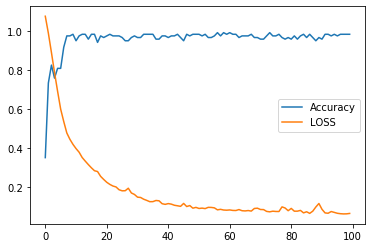

In [175]:
fig, ax = plt.subplots()
ax.plot(history.history['acc'], label="Accuracy")
ax.plot(history.history['loss'], label="LOSS")
ax.legend()